# Data Exploration and Model Selection

The dataset used in this project was sourced from ADITYA RAMACHANDRAN on Kaggle at https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates

The dataset contains columns of qualitative and categorical data on the air quality index of cities around the world. CO (Carbon Monoxide) and NO2 (Nitrogen Dioxide) PM2.5, and Ozone are air polutants that negatively impact human health. For each of these polutants there is a qualitative AQI category and a quantitaive AQI value. Additionally, there are city and country names, and latitude and longitude coordinates for each city.

The target for this project is lattitude and longitude coordinates. The features are the AQI values and categories, and the city and country names. 

The goal of this project is to use prototype selection with KMeans to improve model performance while being trained on a subset of the available data. This part of the project was done int he notebook titled Protype_Selection_KMeans.ipynb

This Notebook contains the data preparation and initial model selection necessary for this second half.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import squarify
import random

# Data Exploration and Preparation

Below we import the dataset and see the first few rows. There are 14 columns total. Country, City, and the AQI category columns contain qualitative data and will need to be one hot encoded.

In [67]:
df = pd.read_csv('AQI and Lat Long of Countries.csv')

df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


Below we see there are 16695 rows in the dataset. The only column with null values is the Country column. However, this accounts for less than 2% of the total data so I will remove the rows that contain null values.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [69]:
df.dropna(subset=['Country'], inplace=True) #drop rows with null Country columns

print(df.isnull().sum()) #check for remaining null values

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64


Below we see the scaling of different columns varies significantly. To improve model performance, we will normalize the quantitative data using sklearn standard scaler. I have left the targets unnormalized.

In [70]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,63.227902,1.349356,31.794424,3.851156,60.075520,30.330645,-4.223929
std,43.297779,2.390045,22.975905,5.911545,43.378779,22.922043,72.909196
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,39.000000,1.000000,20.000000,0.000000,34.000000,16.730000,-75.283300
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.880300,5.601900
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.800000,36.183300
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [71]:
scaler = StandardScaler()
columns_to_scale = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value',	'NO2 AQI Value', 'PM2.5 AQI Value'] #quantitative columns
scaler.fit(df[columns_to_scale]) #fit the columns to be scaled
scaled_features = scaler.transform(df[columns_to_scale]) #transform the columns

df[columns_to_scale] = scaled_features #replace original columns with scaled columns

#check normalization
for column in columns_to_scale:
    print(f"Column: {column}")
    print(f"Mean: {df[column].mean()}")
    print(f"Standard Deviation: {df[column].std()}")
    print("\n") 

Column: AQI Value
Mean: 7.474178795683053e-17
Standard Deviation: 1.0000305022190434


Column: CO AQI Value
Mean: -3.013781772452844e-17
Standard Deviation: 1.0000305022190437


Column: Ozone AQI Value
Mean: 4.5240589303337066e-17
Standard Deviation: 1.0000305022190437


Column: NO2 AQI Value
Mean: 3.2508207882637413e-18
Standard Deviation: 1.0000305022190434


Column: PM2.5 AQI Value
Mean: 4.0161181821674974e-17
Standard Deviation: 1.0000305022190434




We'll also convert our categorical data to numerical data. Let's inspect the different categories to gain insights.

In [72]:
def check_uniques(columns):
    unique_elements = {}

    # Iterate over each column in the DataFrame
    for column in columns:
        unique_elements[column] = df[column].unique()

    # Print the unique elements for each column
    for column, elements in unique_elements.items():
        print(f"Unique elements in {column}:")
        print("length of elements: ", len(elements))
        print(elements)
        print()

columns_to_check = ['Country',	'City',	'AQI Category',	'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
check_uniques(columns_to_check)

Unique elements in Country:
length of elements:  174
['Russian Federation' 'Brazil' 'Italy' 'Poland' 'United States of America'
 'Belgium' 'China' 'Netherlands' 'France' 'Colombia' 'Romania' 'Indonesia'
 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland' 'India' 'Haiti'
 'Philippines' 'Latvia' 'Germany' 'New Zealand' 'Mexico' 'Japan'
 'El Salvador' 'Nigeria' 'South Sudan' 'Ireland' 'Turkey'
 'Democratic Republic of the Congo' 'Canada' 'Switzerland' 'Denmark'
 'Cameroon' 'Australia' 'Portugal' 'Ethiopia' 'Hungary'
 'Iran (Islamic Republic of)' 'Israel' "Côte d'Ivoire" 'Papua New Guinea'
 'Madagascar' 'Ghana' 'Armenia' 'Guatemala' 'Pakistan' 'Thailand'
 'Malaysia' 'Ecuador' 'Argentina' 'Peru' 'Dominican Republic' 'Azerbaijan'
 'Spain' 'Guinea' 'Bolivia (Plurinational State of)' 'Chile'
 'Republic of North Macedonia' 'Kazakhstan' 'Serbia' 'Egypt' 'Czechia'
 'Malawi' 'Sierra Leone' 'Ukraine' 'Benin' 'Namibia' 'Albania' 'Guyana'
 'Senegal' 'Lesotho' 'Venezuela 

For AQI catergories, we can use Label Encoding, which is the process of assigning each column value a unique integer to replace the string. The AQI category columns are well suited for this type of encoding because the data is ordinal, (ie in order). The AQI categories are ranked from best to worst. It follows intuitively that a 0 being labeled good and a 6 being labeled as hazardous would retain the predictive information based on the integer's magnitude. 

We do this below with the .map method in pandas. Which takes a dictionary as an argument. The dictionary maps the string to integers.

In [73]:
columns_to_encode = ['AQI Category',	'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

column_categories = { "AQI Category": ['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy', 'Unhealthy for Sensitive Groups', 'Hazardous']
,
                    "CO AQI Category": ['Good', 'Unhealthy for Sensitive Groups', 'Moderate'],

                    "Ozone AQI Category": ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Unhealthy for Sensitive Groups'],

                    "NO2 AQI Category": ['Good', 'Moderate']
,
                    "PM2.5 AQI Category": ['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy', 'Unhealthy for Sensitive Groups', 'Hazardous']}


for column_to_encode in columns_to_encode:
    categories = column_categories[column_to_encode]  # replace with your actual categories

    # create a dictionary where the keys are the categories and the values are the indices
    encoding_dict = {category: index for index, category in enumerate(categories)}

    # use the dictionary to map the categories to their indices
    df[column_to_encode] = df[column_to_encode].map(encoding_dict)

    # check if there are any null values in the column after encoding
    assert df[column_to_encode].isnull().sum() == 0

df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,-0.282423,0,-0.146176,0,0.183048,0,-0.651483,0,-0.209222,0,44.7444,44.2031
1,Brazil,Presidente Dutra,-0.513388,1,-0.146176,0,-1.166232,0,-0.482318,0,-0.439757,1,-5.2900,-44.4900
2,Brazil,Presidente Dutra,-0.513388,1,-0.146176,0,-1.166232,0,-0.482318,0,-0.439757,1,-11.2958,-41.9869
3,Italy,Priolo Gargallo,0.064026,0,-0.146176,0,0.313624,0,-0.313152,0,0.136580,0,37.1667,15.1833
4,Poland,Przasnysz,-0.675064,1,-0.146176,0,0.095998,0,-0.651483,0,-0.923879,1,53.0167,20.8833


The challenge arises with the Country and City Columns because the data is nominal, ie not in order. If we were to encode labels based on the index of the string, we would likely be adding noise to the data, thus confusing our model. The second difficulty is that there are 13956 Unique cities and 174 unique countries. This eliminates methods like one hot encoding because were we to add a new column for each city, our data would become too highly dimmensional and sparse to be useful.

To get around this, we can rank each country based on the sum of all examples of a given countries AQI values. This will allow to us make the location data ordinal and fit within a single column for city and country each.

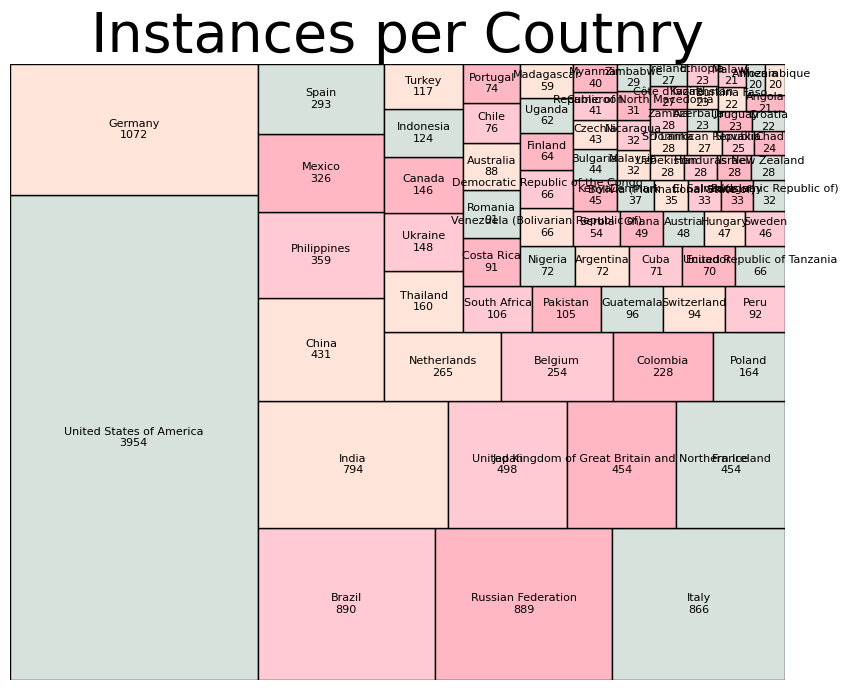

In [74]:
def create_tree_map(column, min_instances=20, figsize=(10, 8), title='title', label_fontsize=15):
    # get num attacks per terror group
    group_counts = df[column].value_counts()
    
    min_instances = min_instances  # Minimum number for a group to be included
    
    group_counts = group_counts[group_counts >= min_instances]
    group_counts = group_counts.sort_values(ascending=False)  # Sort the groups by count in descending order
    labels = [f"{group}\n{count}" for group, count in zip(group_counts.index, group_counts)]
    
    color_map = ['#D8E2DC', '#FFE5D9', '#FFCAD4', '#FFB7C3']
    
    fig, ax = plt.subplots(figsize=figsize)
    squarify.plot(sizes=group_counts.values, label=labels, color=color_map,edgecolor='black')

    # Add labels and title
    plt.title(title, fontsize=40)
    plt.axis('off')
    
    for label in ax.texts:  #label size adjustments
        label.set_fontsize(label_fontsize)

    # Display the treemap
    plt.show()

create_tree_map('Country', min_instances=20, figsize=(10, 8), title='Instances per Coutnry', label_fontsize=8)


In the code below we assign each country an integer that is determined by a rank ordering of various AQI metrics that agregrate all AQI data for each coutry together. The idea here is to provide qualitative information to the country and city columns that will be useful to our model while avoiding the trouble of high dimensionality and sparsity that would come with one hot encoding. 

One potential issue with one of the below approaches (summing all AQI vals) is that it's possible that doing a sum of the countries will not be representative of the geographic AQI reality because the countries with more cities might be misrepresented to have higher AQI scores than their average city does. The tree map above does a good job at visualizing the issue. The size of each rectangle is proportional to the number of rows that belong to that country. 

To protect against any issues this may cause. We will also create another version of the dataset where the countries index sum is averaged by number of countries. As well as one that does not contain the country and city column at all. The dataset that enables our regressor to perform the best will be used for our baseline model.

In [75]:
df_summation = df.copy()

for city_country in ["Country", "City"]:
    # Step 1: Sum up the AQI val columns for each country
    country_sums = df.groupby(city_country)[['AQI Value', 'CO AQI Value', 'Ozone AQI Value',	'NO2 AQI Value', 'PM2.5 AQI Value']].sum().sum(axis=1)

    # Step 2: Rank the countries based on this sum. 
    # The method='min' ensures countries with equal sums get the same rank
    country_ranks = country_sums.rank(method='min').astype(int)

    # Step 3: Map these ranks back to the original DataFrame.
    # The 'Country' column in the DataFrame is replaced by the ranks
    df_summation[city_country] = df[city_country].map(country_ranks)

    # Ensure that the mapping was successful, by checking if there are any null values in the 'Country' column
    assert df_summation[city_country].isnull().sum() == 0


df_averaged = df.copy()

for city_country in ["Country", "City"]:
    # Step 1: Calculate the mean AQI val for each country or city
    country_averages = df.groupby(city_country)[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean().mean(axis=1)

    # Step 2: Rank the countries based on this average. 
    # The method='min' ensures countries with equal averages get the same rank
    country_ranks = country_averages.rank(method='min').astype(int)

    # Step 3: Map these ranks back to the DataFrame copy.
    # The 'Country' or 'City' column in the DataFrame is replaced by the ranks
    df_averaged[city_country] = df[city_country].map(country_ranks)

    # Ensure that the mapping was successful, by checking if there are any null values in the 'Country' or 'City' column
    assert df_averaged[city_country].isnull().sum() == 0

Now, countries with high air pollution are given an index rating that is higher than countries with low air pollution.

# Model Selection

Now that we have some simple processing done on the data, let's explore what type of model would best fit the dataset. We'll start by looking at a scatter plot of the latidude against the longitude.

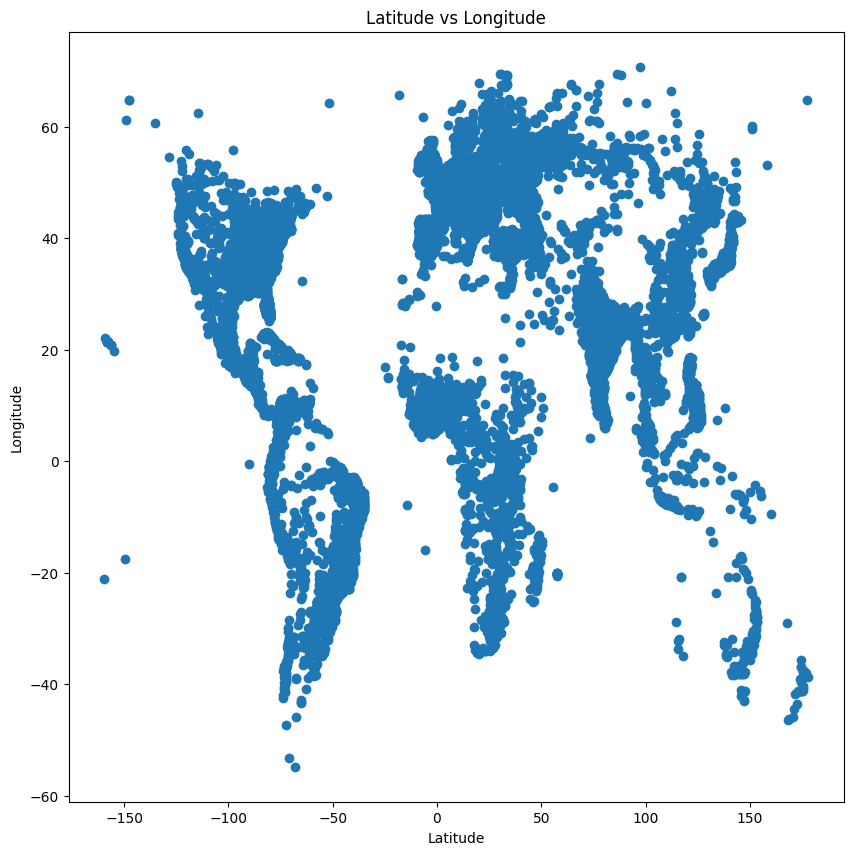

In [58]:
#create a scatterplot of the lattitue and longitude
plt.figure(figsize=(10, 10))
plt.scatter(df['lng'], df['lat'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')

plt.show()

The scatter plot shows that the data is not linearly seperable. This suggests that a linear regression model would not be a good fit. Polynomial regression would also be too simple. 

If you look closely, you can see the distribution of this data is in the shape of the Earth's continents. A model that is able to draw a decision boundary around each geographic hotspot would be well suited for this task. The nonlinearity rules out SVM. However, random forest regressor would be a good fit. 

The random forest algorithm works by creating a large number of decision trees and averaging their predictions. Each tree is trained on a random subset of the data. This is called bagging. The random forest algorithm is a good fit for this dataset because it is able to draw decision boundaries around each geographic hotspot. And furthermore, because it is the aggregate of many decision trees, the decision boundarys will be able to map the subtlies of the geography. 

Random Forest is also able to output two quantities, which elimantes any need for us to train two simpler models for latitude and longitude.

# Data Versioning -- Country AQI Summation Index Dataset

Let's start by training a Random Forest Regressor on the summation dataset and see how it performs. 

First, we'll split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing. We'll also remove the country and city columns from the training and testing sets.

In [59]:
#turn df --> np array
X = df_summation.drop(['lat', 'lng'], axis=1).values
y = df_summation[['lat', 'lng']].values

print("X shape: ", X.shape)
print("y shape: ", y.shape, "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X shape:  (16393, 12)
y shape:  (16393, 2) 

X_train shape:  (13114, 12)
X_test shape:  (3279, 12)
y_train shape:  (13114, 2)
y_test shape:  (3279, 2)


We are going to use GridSearchCV to find a good combo of hyperparams

In [60]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in random forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Instantiate the grid search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1) #cv = number of folds, n_jobs = number of jobs to run in parallel, -1 = use all processors

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train and predict using the model with best parameters
best_grid = grid_search.best_estimator_

# Make predictions
predictions = best_grid.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
print(f"Mean Squared Error for model trained on all the data: {mse}")

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error for model trained on all the data: [ 88.20046616 978.64651339]


MSE on this baseline model is 88.2 for latitude and 978.6 for longitdute. This means the model performs better in predicting how far north/south a city is than how far east/west it is. 

Below we see some prediction/real comparisions in isolation.

In [61]:
for i in range(5):
    num = random.randint(0, len(X_test))
    #test on an example from the test set:
    print("Actual: ", y_test[num])
    print("Predicted: ", predictions[num], '\n')

Actual:  [-27.3589 -53.3939]
Predicted:  [-16.14024144 -47.11778737] 

Actual:  [53.4699  8.6479]
Predicted:  [52.61986267  9.86920359] 

Actual:  [51.      4.1167]
Predicted:  [50.97238598  4.19633102] 

Actual:  [51.695   6.8756]
Predicted:  [51.04356426  7.48699643] 

Actual:  [ 36.6826 -79.8636]
Predicted:  [ 38.00853934 -74.17669232] 



# Data Versioning --  Country AQI Averaged Index Dataset

Next, we'll train a Random Forest Regressor on the averaged dataset and see how it performs.

In [62]:
#turn df --> np array
X = df_averaged.drop(['lat', 'lng'], axis=1).values
y = df_averaged[['lat', 'lng']].values

print("X shape: ", X.shape)
print("y shape: ", y.shape, "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X shape:  (16393, 12)
y shape:  (16393, 2) 

X_train shape:  (13114, 12)
X_test shape:  (3279, 12)
y_train shape:  (13114, 2)
y_test shape:  (3279, 2)


In [63]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in random forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Instantiate the grid search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1) #cv = number of folds, n_jobs = number of jobs to run in parallel, -1 = use all processors

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train and predict using the model with best parameters
best_grid = grid_search.best_estimator_

# Make predictions
predictions = best_grid.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
print(f"Mean Squared Error for model trained on all the data: {mse}")

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error for model trained on all the data: [  87.03823362 1010.9348803 ]


Interesting. The dataset with the averaged AQI values to represent city and country performed worse on longitude. Although only slightly. 

This could be because the summing process captures the size of the country better than the average, which would offer another useful feature.

# Data Versioning -- City and Country Data Removed Dataset

For a final comparison, we'll also train a model without the country and city columns.

In [65]:
#turn df --> np array
X = df.drop(['lat', 'lng', 'Country', 'City',], axis=1).values
y = df[['lat', 'lng']].values

print("X shape: ", X.shape)
print("y shape: ", y.shape, "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X shape:  (16393, 10)
y shape:  (16393, 2) 

X_train shape:  (13114, 10)
X_test shape:  (3279, 10)
y_train shape:  (13114, 2)
y_test shape:  (3279, 2)


In [66]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in random forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Instantiate the grid search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1) #cv = number of folds, n_jobs = number of jobs to run in parallel, -1 = use all processors

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train and predict using the model with best parameters
best_grid = grid_search.best_estimator_

# Make predictions
predictions = best_grid.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
print(f"Mean Squared Error for model trained on all the data: {mse}")

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error for model trained on all the data: [ 183.74806719 3380.89308883]


# Final Results - Summation Dataset is Best

This model performed significantly worse than the other two. We will use the summed country and city dataset and model for our baseline.

In [77]:
df_summation = df_summation.to_numpy()
np.save('processed_AQI.npy', df_summation)

#Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
#Mean Squared Error for model trained on all the data: [ 88.20046616 978.64651339]